In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [5]:
orig_data = pd.read_excel(r'F:\1\data1\全国数据\ML营地\ML-camp\train_dataset.xlsx')

In [6]:
X = orig_data.iloc[ :,1:5]

In [8]:
X.head()

,GDP,DEM,NDVI,POP
0,1391.453125,89.909721,0.839250,0.017795
1,7251.125000,213.777771,0.852556,0.062728
2,1800.911743,68.500000,0.734621,0.027159
3,3708.736084,370.562500,0.865875,0.023958
4,799.234375,613.131958,0.887333,0.016922


特征选取

<AxesSubplot:xlabel='NDVI', ylabel='DEM'>

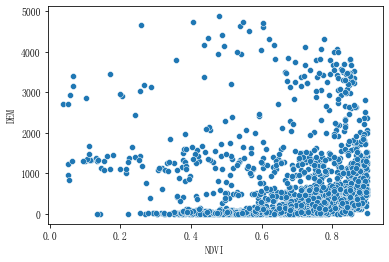

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='FangSong')
sns.scatterplot(x="NDVI",y='DEM',data=X)

In [20]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
DB_df_standardize=pd.DataFrame(data=X_scaled,columns=list(X.columns))
DB_df_standardize

,GDP,DEM,NDVI,POP
0,-0.310150,-0.583193,0.805281,-0.422677
1,-0.156003,-0.439913,0.885153,-0.195107
2,-0.299379,-0.607958,0.177204,-0.375254
3,-0.249191,-0.258558,0.965108,-0.391463
4,-0.325729,0.022026,1.093920,-0.427100
...,...,...,...,...
2069,-0.345780,0.033737,0.440231,-0.509150
2070,-0.346170,-0.046310,0.599016,-0.510607
2071,-0.345394,0.085886,0.422598,-0.511048
2072,-0.328677,0.039654,-0.561499,-0.448215


In [21]:
#训练模型
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps= 0.6,min_samples= 4)
DB.fit(DB_df_standardize)

DBSCAN(eps=0.6, min_samples=4)

In [22]:
DB_label= pd.DataFrame(DB.labels_,columns=['新标签'])
DB_df = pd.concat([X,DB_label],axis=1)
DB_df.head()

,GDP,DEM,NDVI,POP,新标签
0,1391.453125,89.909721,0.839250,0.017795,0
1,7251.125000,213.777771,0.852556,0.062728,0
2,1800.911743,68.500000,0.734621,0.027159,0
3,3708.736084,370.562500,0.865875,0.023958,0
4,799.234375,613.131958,0.887333,0.016922,0


<AxesSubplot:xlabel='NDVI', ylabel='DEM'>

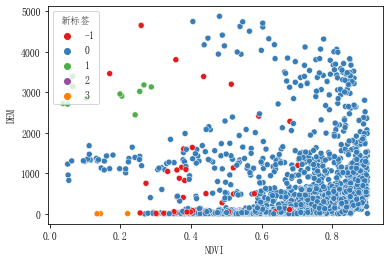

In [23]:
plt.rcParams['axes.unicode_minus']= False
sns.set_palette('dark',5)
sns.scatterplot(x="NDVI",y='DEM',hue='新标签',data=DB_df,palette = 'Set1')

聚类分析，对每一格聚类进行进一步分析描述

In [24]:
final_df=DB_df
#summary_df 用于对聚类的分析，下一步求平均值
summary_df=final_df.groupby('新标签').mean().round()
#round表示4舍5入
#求每一个类别中的数目
summary_df['数目']=final_df.groupby('新标签').size()
summary_df

,GDP,DEM,NDVI,POP,数目
新标签,,,,,
-1,151125.0,544.0,0.0,1.0,77
0,7681.0,584.0,1.0,0.0,1978
1,48.0,2950.0,0.0,0.0,12
2,123464.0,23.0,0.0,1.0,4
3,4913.0,3.0,0.0,0.0,3
